<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab7/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

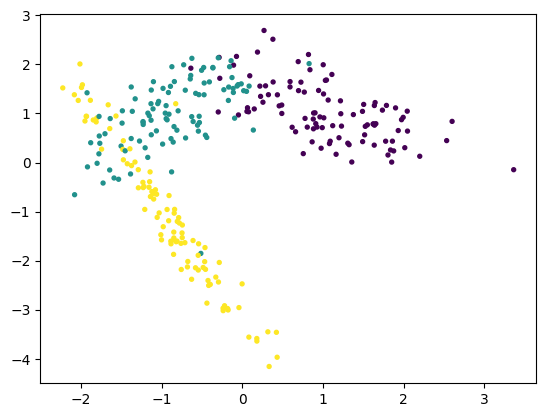

In [5]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

X,y = make_classification(n_samples=300, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=412)



plt.scatter(X[:,0], X[:,1],c=y,s=8)

In [ ]:
#1

In [80]:
from collections import Counter

class KNeibours:
  def __init__(self, distance, k_neib):
    self.distance = distance
    self.k = k_neib

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X):
    return np.array([self.classify(x_i) for x_i in X])

  def classify(self, x):
    distances = [(self.distance(x_i, x), y_i) for x_i,y_i in zip(self.X, self.y)]

    sorted_dist = sorted(distances, key= lambda x: x[0])[1: self.k + 1]

    return Counter([x_i[1] for x_i in sorted_dist]).most_common(1)[0][0]

  def score(self):
    out = np.array([self.classify(x_i) for x_i in self.X])
    return np.sum(y - out == 0) / out.size

In [84]:
distance = lambda x,y: ((x-y)**2).sum()

kng = KNeibours(distance,3)
kng.fit(X,y)

kng.score()

0.9066666666666666

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

accuracy = knn.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.93


100%|██████████| 100/100 [00:39<00:00,  2.53it/s]


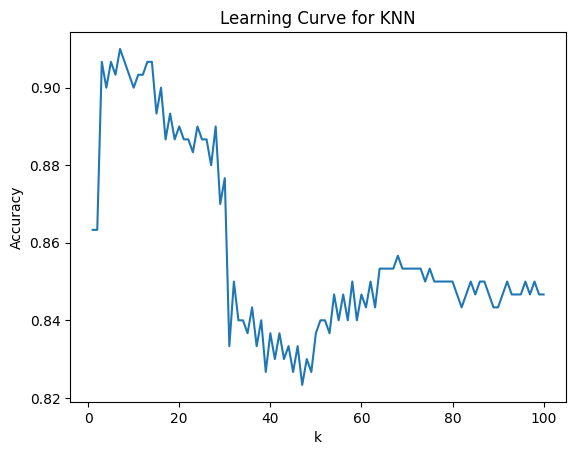

In [90]:
rg = 100
scores = []
for k in tqdm(range(1,rg+1)):
  kng = KNeibours(distance,k)
  kng.fit(X,y)
  scores.append(kng.score())

plt.plot(range(1, rg+1), scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Learning Curve for KNN')
plt.show()

In [92]:
#task 2

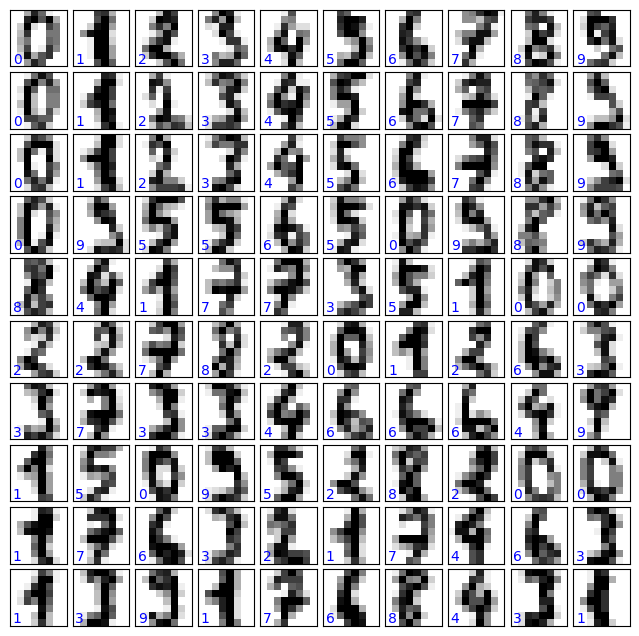

In [95]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')

In [96]:
x_test,x_train,y_test,y_train = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)



In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


rg = LogisticRegression()
rg.fit(x_train, y_train)
rg.score(x_test, y_test)

0.9554627696590118

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9547668754349339
